In [1]:
from utils.bkg_model import Model
from utils.analysis.signal import Data, SixB

In [2]:
data = Data("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/JetHT_Data_UL/JetHT_Run2018_full/ntuple.root", "config/bdt_params.cfg")
sixb = SixB("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root", "config/bdt_params.cfg")

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root


In [15]:
ak.sum(data.V_CRhs_mask), ak.sum(data.V_CRls_mask)

(5147, 43138)

In [16]:
ak.sum(data.V_SRhs_mask), ak.sum(data.V_SRls_mask)

(1990, 16717)

In [4]:
sixb.mxmy

'MX_1200_MY_300'

In [4]:
# score_bins = np.linspace(0,1.01,61)

In [5]:
# fig, ax = plt.subplots()

# sixb.hist(sixb.A_SR_avgbtag, bins=score_bins, ax=ax, density=True)
# sixb.hist(data.A_CR_avgbtag, bins=score_bins, ax=ax, density=True)

# # n = Hist(sixb.A_SR_avgbtag, bins=score_bins, ax=ax, density=True)
# # n = Hist(data.A_CR_avgbtag, bins=score_bins, ax=ax, density=True)
# ax.plot([0.66,0.66], [0,0.06], color='gray', ls='--')
# ax.set_xlabel('Average DeepJet b tag score of Higgs Jet Candidates')

# fig.savefig('plots/6_background_modeling/avg_btag_1200_300.pdf')

# # fig, ax = plt.subplots()

# # n = Hist(bias_sixb.A_SR_avgbtag, bins=score_bins, ax=ax, density=True)
# # n = Hist(bias_data.A_CR_avgbtag, bins=score_bins, ax=ax, density=True)
# # ax.plot([0.66,0.66], [0,0.06], color='gray', ls='--')

In [94]:
data.set_bdt_params('config/bdt_params.cfg')

In [33]:
variables = data.variables
variables

['pt6bsum',
 'dR6bmin',
 'dEta6bmax',
 'HX_pt',
 'H1_pt',
 'H2_pt',
 'HX_dr',
 'H1_dr',
 'H2_dr',
 'HX_m',
 'H1_m',
 'H2_m',
 'HX_H1_dEta',
 'H1_H2_dEta',
 'H2_HX_dEta',
 'HX_H1_dPhi',
 'H1_H2_dPhi',
 'H2_HX_dPhi',
 'HX_costheta',
 'H1_costheta',
 'H2_costheta',
 'Y_m',
 'X_m']

In [34]:
popped_vars = []
vcr_p, vsr_p, vsr_const_p = [], [], []
vsr_var_p = []

for i,variable in enumerate(variables):
    temp_vars = variables.copy()
    popped_var = temp_vars.pop(i)
    popped_vars.append(popped_var)

    data.set_variables(temp_vars)
    data.train()

    vcr_p.append(data.v_cr_model_ks_p)
    vsr_p.append(data.v_sr_model_ks_p)
    vsr_const_p.append(data.v_sr_const_ks_p)

    vars_ks = []
    for var in variables:
        stat, p = data.ks_test(var, data.V_SRls_mask, data.V_SRhs_mask, data.V_SR_ls_weights)
        vars_ks.append(p)

    vsr_var_p.append(vars_ks)

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. training in validation region

.. training in analysis region

.. trainin

In [39]:
np.row_stack((vsr_var_p)).shape

(23, 23)

In [29]:
vsr_var_p

[[88, 61, 92, 94, 86, 30, 37, 92, 69, 26, 93, 13, 30, 72, 15, 61, 79, 45, 49],
 [76, 94, 91, 94, 80, 33, 39, 82, 66, 29, 93, 12, 30, 69, 15, 56, 72, 40, 48],
 [79, 66, 94, 94, 80, 37, 43, 79, 77, 29, 92, 13, 30, 72, 15, 56, 67, 46, 49],
 [77, 72, 96, 77, 77, 32, 35, 80, 72, 29, 92, 14, 31, 64, 13, 54, 74, 51, 49],
 [77, 64, 94, 90, 96, 36, 42, 82, 74, 29, 92, 12, 30, 72, 17, 61, 69, 54, 46],
 [66, 66, 94, 91, 79, 52, 39, 74, 71, 29, 91, 15, 32, 67, 14, 52, 77, 56, 48],
 [69, 64, 90, 88, 83, 35, 80, 83, 87, 29, 90, 12, 31, 67, 17, 57, 69, 45, 49],
 [64, 62, 90, 79, 76, 20, 40, 59, 74, 29, 88, 12, 30, 62, 15, 57, 82, 49, 46],
 [79, 49, 94, 90, 77, 35, 32, 69, 85, 29, 94, 12, 26, 72, 14, 56, 72, 51, 48],
 [82, 74, 95, 90, 82, 39, 42, 80, 82, 22, 92, 12, 26, 69, 17, 59, 79, 48, 45],
 [64, 52, 94, 87, 85, 37, 42, 82, 69, 31, 90, 12, 33, 71, 16, 59, 69, 45, 46],
 [64, 66, 93, 94, 92, 29, 37, 80, 69, 30, 92, 11, 33, 69, 15, 61, 79, 51, 45],
 [69, 59, 94, 85, 85, 29, 40, 72, 67, 28, 91, 12, 33

In [41]:
np.array((popped_vars))[np.average(np.row_stack((vsr_var_p)), axis=1).argsort()]

array(['HX_costheta', 'H2_costheta', 'HX_m', 'H1_H2_dPhi', 'X_m',
       'HX_H1_dPhi', 'pt6bsum', 'H1_pt', 'dEta6bmax', 'HX_H1_dEta',
       'dR6bmin', 'H2_dr', 'H2_HX_dEta', 'H1_H2_dEta', 'H2_pt', 'H1_dr',
       'HX_pt', 'H2_m', 'H1_m', 'HX_dr', 'H2_HX_dPhi', 'Y_m',
       'H1_costheta'], dtype='<U11')

In [28]:
np_vsr_p = np.row_stack((vsr_var_p))
popped_vars[np.average(np_vsr_p, axis=1).argmax()]

'H2_HX_dPhi'

In [39]:
for var, p_vcr, p_vsr, p_vsr_const in zip(popped_vars, vcr_p, vsr_p, vsr_const_p):
    print(f"Popped variable: {var}")
    print(f"VCR = {p_vcr}%, VSR = {p_vsr}%, VSR_const = {p_vsr_const}%")

Popped variable: pt6bsum
VCR = 54.9%, VSR = 72.8%, VSR_const = 21.8%
Popped variable: dR6bmin
VCR = 59.2%, VSR = 73.6%, VSR_const = 21.8%
Popped variable: dEta6bmax
VCR = 44.7%, VSR = 90.0%, VSR_const = 21.8%
Popped variable: HX_pt
VCR = 75.2%, VSR = 66.8%, VSR_const = 21.8%
Popped variable: H1_pt
VCR = 41.4%, VSR = 78.4%, VSR_const = 21.8%
Popped variable: H2_pt
VCR = 41.5%, VSR = 86.4%, VSR_const = 21.8%
Popped variable: HX_dr
VCR = 65.6%, VSR = 70.3%, VSR_const = 21.8%
Popped variable: H1_dr
VCR = 56.7%, VSR = 79.4%, VSR_const = 21.8%
Popped variable: H2_dr
VCR = 62.7%, VSR = 74.4%, VSR_const = 21.8%
Popped variable: HX_m
VCR = 49.5%, VSR = 76.4%, VSR_const = 21.8%
Popped variable: H1_m
VCR = 77.8%, VSR = 70.1%, VSR_const = 21.8%
Popped variable: H2_m
VCR = 52.8%, VSR = 70.1%, VSR_const = 21.8%
Popped variable: HX_H1_dEta
VCR = 46.8%, VSR = 81.8%, VSR_const = 21.8%
Popped variable: H1_H2_dEta
VCR = 45.2%, VSR = 81.5%, VSR_const = 21.8%
Popped variable: H2_HX_dEta
VCR = 64.4%, VSR = 

In [25]:
data.set_bdt_params(cfg='config/bdt_params.cfg')
data.mBins.shape

(41,)

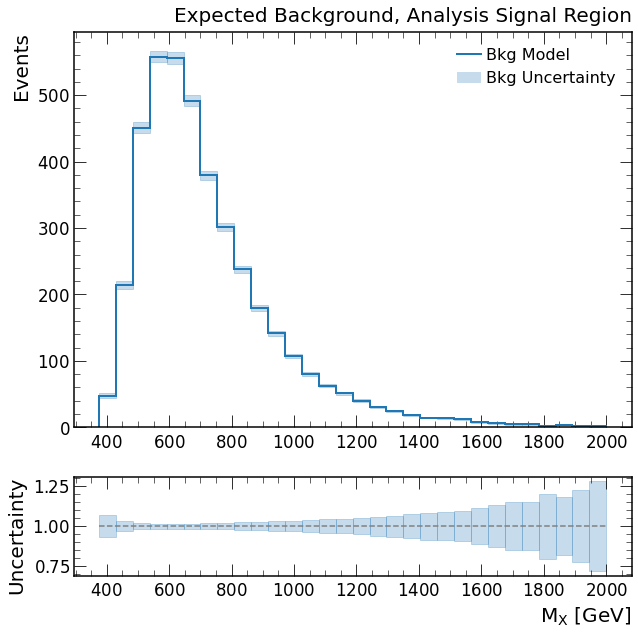

In [5]:
# data.train()
# _ = data.v_cr_hist()
# _ = data.v_sr_hist()
fig, axs, n_data = data.sr_hist()
axs[0].set_title("Expected Background, Analysis Signal Region")
fig.savefig("plots/6_background_modeling/btag_pt/data_asr_model.pdf")

In [79]:
data.VR_err

array([0.        , 0.        , 0.63798012, 2.73494487, 4.75855521,
       5.7236477 , 5.80621641, 5.42043058, 4.93123001, 4.3986424 ,
       3.73745795, 3.34147389, 2.70470315, 2.37494087, 2.09605831,
       1.92987672, 1.65738034, 1.41612282, 1.29100059, 1.04866687,
       0.90364086, 0.86063447, 0.6716394 , 0.71377593, 0.55852239,
       0.47354514, 0.42681538, 0.41633373, 0.41704929, 0.3850561 ])

In [43]:
print("Validation Control Region")
print(f"t-statistic = {data.v_cr_model_ks_t}")
print(f"probability = {data.v_cr_model_ks_p}%")
print()

print("Validation Signal Region, Unweighted")
print(f"t-statistic = {data.v_sr_const_ks_t}")
print(f"probability = {data.v_sr_const_ks_p}%")
print()

print("Validation Signal Region, Model")
print(f"t-statistic = {data.v_sr_model_ks_t}")
print(f"probability = {data.v_sr_model_ks_p}%")

# Nestimators = 70
# learningRate = 0.15
# maxDepth = 4
# minLeaves = 275
# GBsubsample = 0.6
# randomState = 2020

Validation Control Region
t-statistic = 0.49
probability = 96%

Validation Signal Region, Unweighted
t-statistic = 1.05
probability = 22%

Validation Signal Region, Model
t-statistic = 0.77
probability = 59%


In [106]:
vars_ks = []
for var in variables:
    stat, p = data.ks_test(var, data.V_SRls_mask, data.V_SRhs_mask, data.V_SR_ls_weights)
    vars_ks.append(p)
    print(var, p)

pt6bsum 54
dR6bmin 80
dEta6bmax 31
HX_pt 93
H1_pt 69
H2_pt 90
HX_dr 28
H1_dr 42
H2_dr 61
HX_m 79
H1_m 86
H2_m 33
HX_H1_dEta 49
H1_H2_dEta 22
H2_HX_dEta 42
HX_H1_dPhi 71
H1_H2_dPhi 18
H2_HX_dPhi 66
HX_costheta 95
H1_costheta 15
H2_costheta 88
Y_m 56
X_m 59


In [30]:
data.Nestimators

70

In [53]:
data.set_bdt_params(cfg='config/bdt_params.cfg')
data.mBins.shape

(31,)

In [60]:
from scipy.optimize import curve_fit

In [61]:
def gauss(x, H, A, x0, sigma):
   return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

/uscms_data/d3/srosenzw/mambaforge/envs/sixb/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/uscms_data/d3/srosenzw/mambaforge/envs/sixb/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/uscms_data/d3/srosenzw/mambaforge/envs/sixb/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


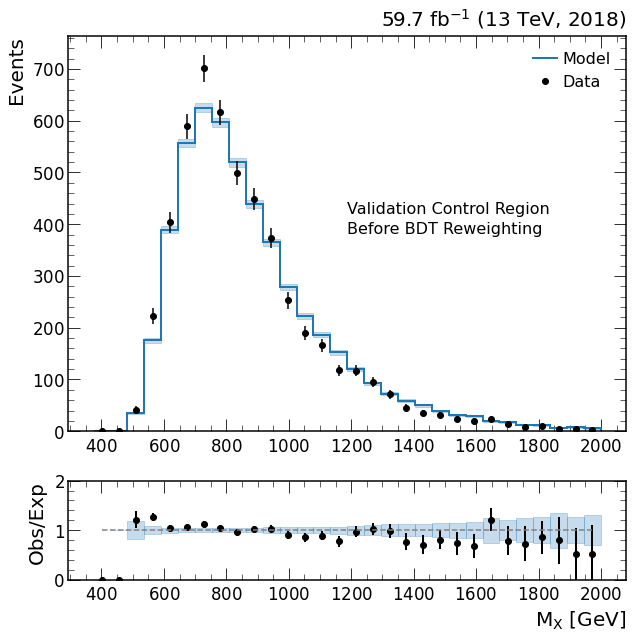

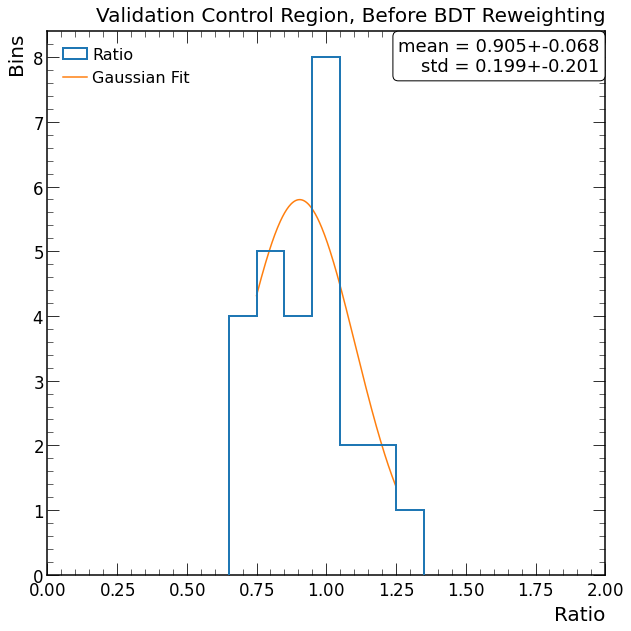

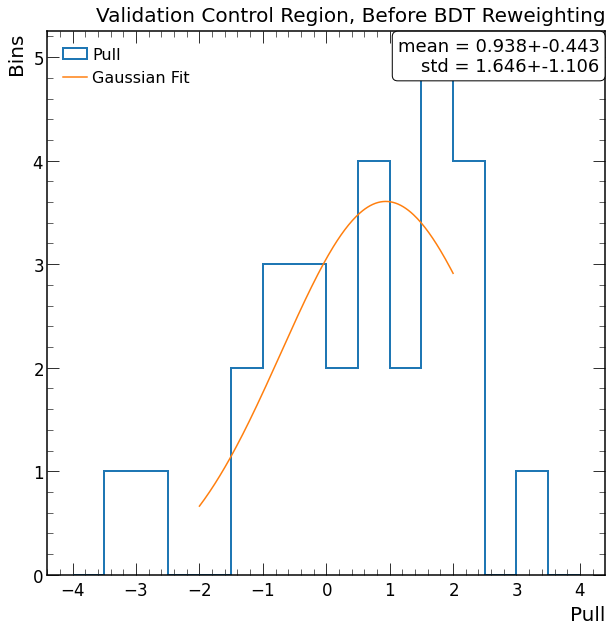

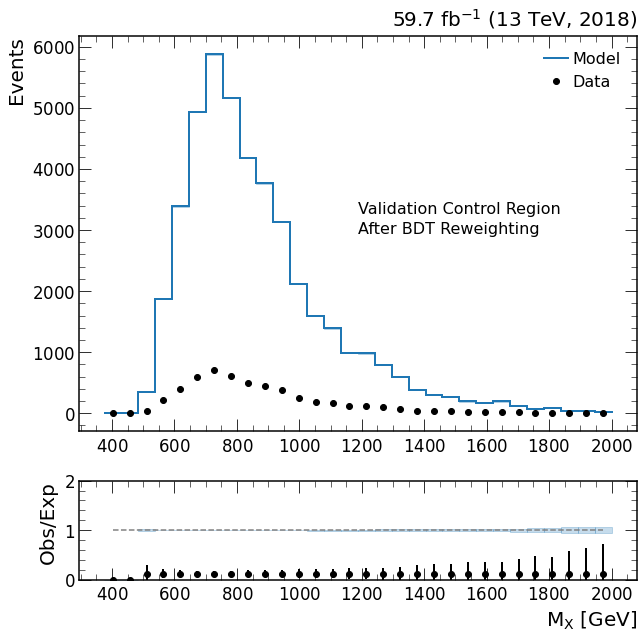

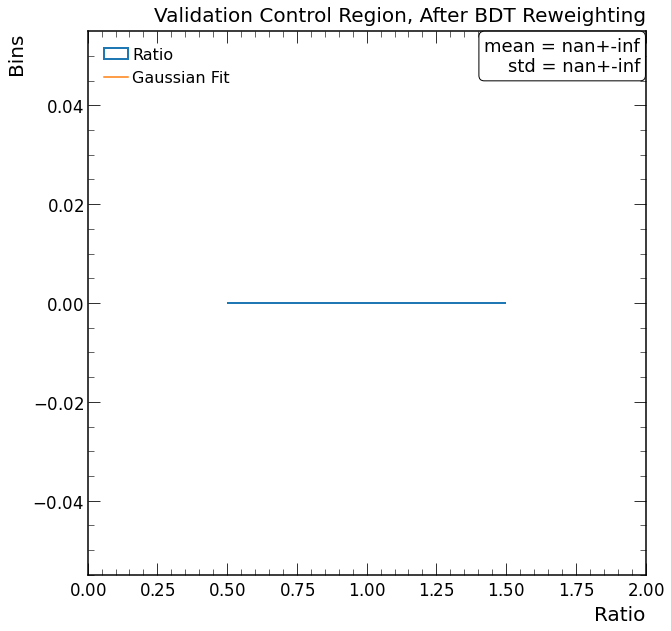

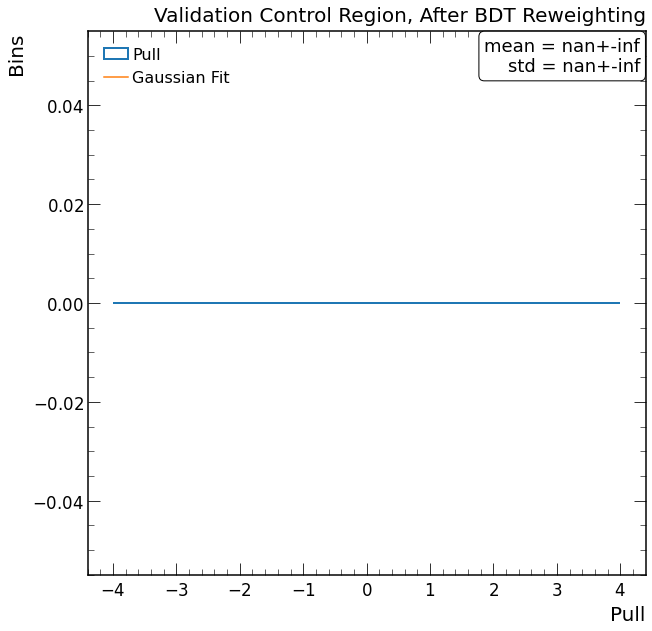

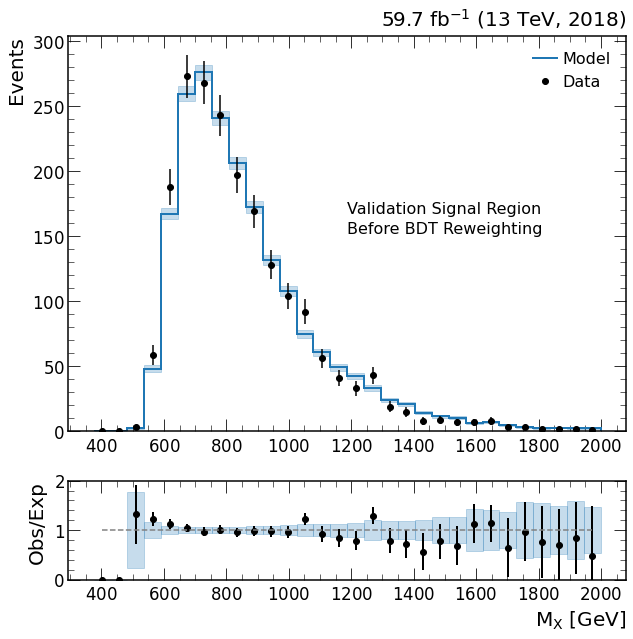

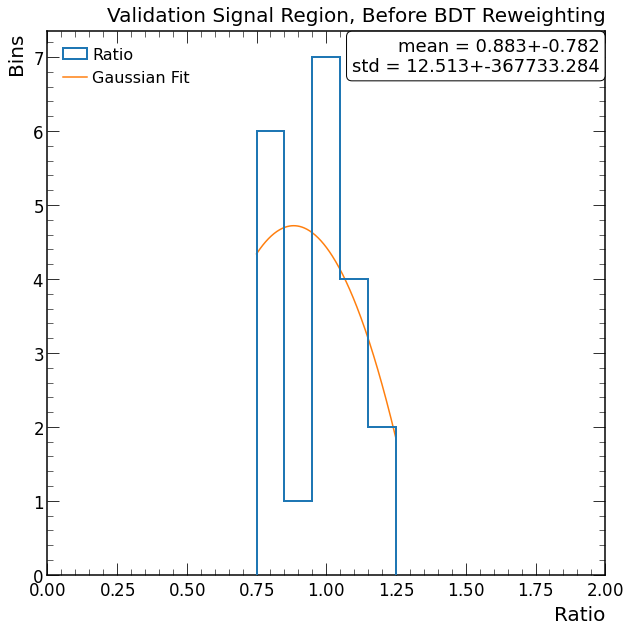

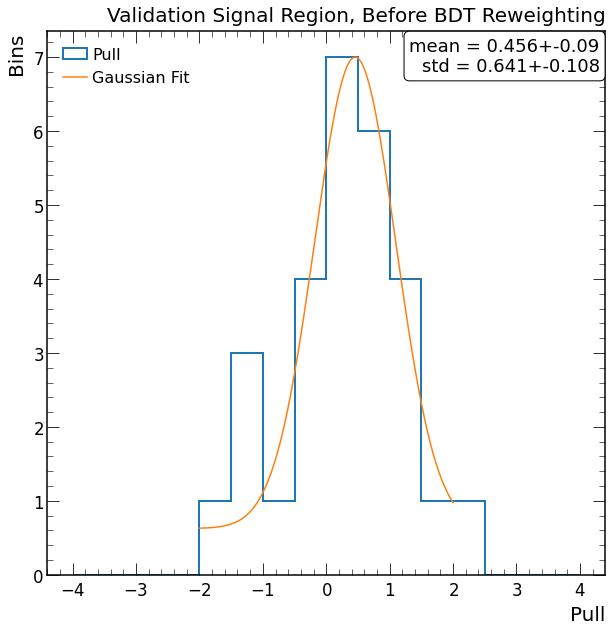

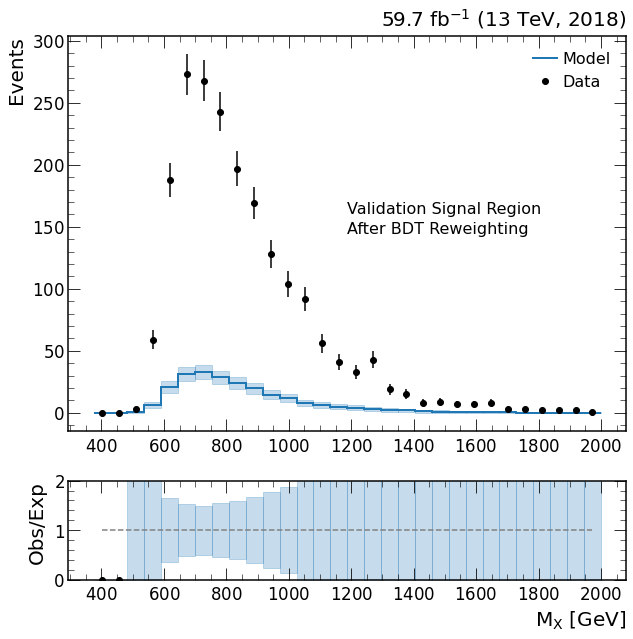

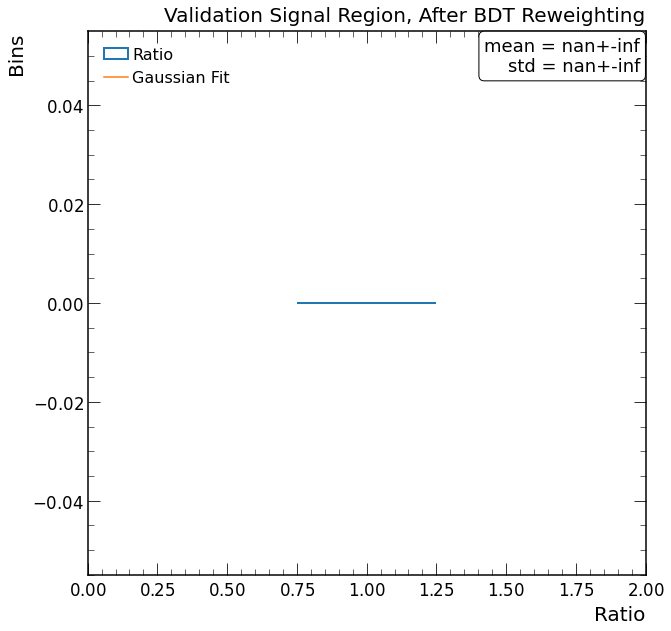

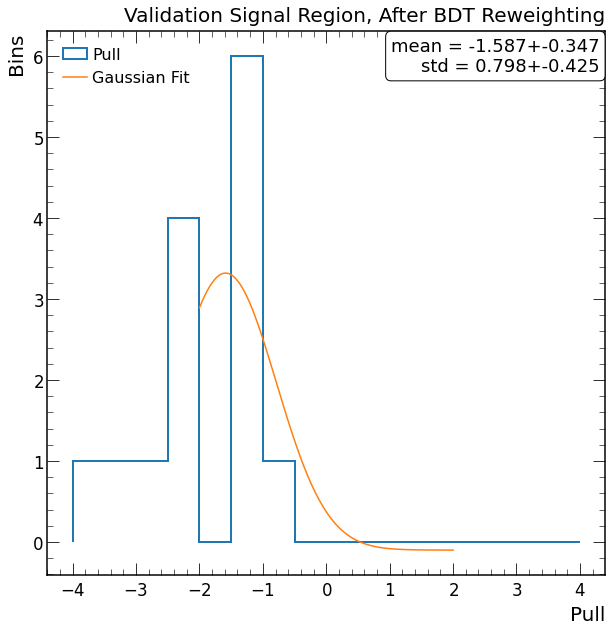

In [131]:
bin_width = 0.5

norm = data.V_CRhs_mask.sum()/data.V_CRls_mask.sum()

fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_CRls_mask, data.V_CRhs_mask, np.ones(sum(data.V_CRls_mask))*norm, density=False, vcr=True, variable='X_m')
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.5, 0.55, 'Validation Control Region', transform=ax.transAxes, fontsize=16)
ax.text(0.5, 0.5, 'Before BDT Reweighting', transform=ax.transAxes, fontsize=16)
fig.savefig('plots/6_background_modeling/btag_pt/mx_vcr_before_bdt.pdf')

fig, ax = plt.subplots()

ax.set_title('Validation Control Region, Before BDT Reweighting')

rBins = np.arange(0.65,1.350001,0.1)
rX = (rBins[:-1] + rBins[1:]) / 2
n_rat = Hist(n_ratio, bins=rBins, ax=ax, label='Ratio', align='mid', zorder=10)
ax.set_xlim(0,2)

mean = (rX*n_rat).sum()/n_rat.sum()
sigma = np.sqrt(sum(n_rat * (rX-mean) ** 2) / sum(n_rat))

X = np.linspace(0.75,1.25,200)
params, covar = curve_fit(gauss, rX, n_rat, p0=[min(n_rat), max(n_rat), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

y_r = gauss(rX, H, A, x0, s)
y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')

ax.legend(loc=2)
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.set_xlabel('Ratio')
ax.set_ylabel('Bins')

fig.savefig('plots/6_background_modeling/btag_pt/mx_ratio_vcr_before_bdt.pdf')

fig, ax = plt.subplots()

bins = np.arange(-3,3.0001,bin_width)
diff = n_exp - n_obs
e_diff = np.sqrt(n_obs + data.VR_err)
pull = diff / e_diff
n_pull, e = np.histogram(pull, bins=bins)
pBins = np.arange(-4,4.0001,bin_width)
pX = (pBins[:-1] + pBins[1:]) / 2
N_pull = Hist(pull, bins=pBins, ax=ax, align='mid', label='Pull')
err_pull = np.sqrt(N_pull)
# for n,err,xval in zip(N_pull, err_pull, pX):
    # ax3.plot([xval,xval],[n+err,n-err], color='C0')

x = (bins[:-1] + bins[1:]) / 2
X = np.linspace(-2,2,200)

ax.set_xlabel('Pull')
ax.set_ylabel('Bins')

ax.legend(loc=2)
ax.set_title('Validation Control Region, Before BDT Reweighting')

mean = (x*n_pull).sum()/n_pull.sum()
sigma = np.sqrt(sum(n_pull * (x - mean) ** 2) / sum(n_pull))

params, covar = curve_fit(gauss, x, n_pull, p0=[min(n_pull), max(n_pull), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

fit_pull = gauss(pX, H, A, x0, s)

y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.legend(loc=2)

fig.savefig('plots/6_background_modeling/btag_pt/mx_pull_vcr_before_bdt.pdf')








fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_CRls_mask, data.V_CRhs_mask, data.V_CR_ls_weights, density=False, vcr=True, variable='X_m', norm=vsr_norm)
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.5, 0.55, 'Validation Control Region', transform=ax.transAxes, fontsize=16)
ax.text(0.5, 0.5, 'After BDT Reweighting', transform=ax.transAxes, fontsize=16)
fig.savefig('plots/6_background_modeling/btag_pt/mx_vcr_after_bdt.pdf')

fig, ax = plt.subplots()

rBins = np.arange(0.5,1.50001,0.1)
rX = (rBins[:-1] + rBins[1:]) / 2
n_rat = Hist(n_ratio, bins=rBins, ax=ax, label='Ratio', align='mid', zorder=10)
ax.set_xlim(0,2)

mean = (rX*n_rat).sum()/n_rat.sum()
sigma = np.sqrt(sum(n_rat * (rX-mean) ** 2) / sum(n_rat))

X = np.linspace(0.5,1.5,200)
params, covar = curve_fit(gauss, rX, n_rat, p0=[min(n_rat), max(n_rat), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

y_r = gauss(rX, H, A, x0, s)
y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')

ax.legend(loc=2)
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.set_xlabel('Ratio')
ax.set_ylabel('Bins')

ax.set_title('Validation Control Region, After BDT Reweighting')
fig.savefig('plots/6_background_modeling/btag_pt/mx_ratio_vcr_after_bdt.pdf')


fig, ax = plt.subplots()

bins = np.arange(-3,3.0001,bin_width)
diff = n_exp - n_obs
e_diff = np.sqrt(n_obs + data.VR_err)
pull = diff / e_diff
n_pull, e = np.histogram(pull, bins=bins)
pBins = np.arange(-4,4.0001,bin_width)
pX = (pBins[:-1] + pBins[1:]) / 2
N_pull = Hist(pull, bins=pBins, ax=ax, align='mid', label='Pull')
err_pull = np.sqrt(N_pull)
# for n,err,xval in zip(N_pull, err_pull, pX):
    # ax3.plot([xval,xval],[n+err,n-err], color='C0')

x = (bins[:-1] + bins[1:]) / 2
X = np.linspace(-2,2,200)

ax.set_xlabel('Pull')
ax.set_ylabel('Bins')

mean = (x*n_pull).sum()/n_pull.sum()
sigma = np.sqrt(sum(n_pull * (x - mean) ** 2) / sum(n_pull))

params, covar = curve_fit(gauss, x, n_pull, p0=[min(n_pull), max(n_pull), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

fit_pull = gauss(pX, H, A, x0, s)

y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.set_title('Validation Control Region, After BDT Reweighting')

ax.legend(loc=2)

fig.savefig('plots/6_background_modeling/btag_pt/mx_pull_vcr_after_bdt.pdf')






fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_SRls_mask, data.V_SRhs_mask, np.ones(sum(data.V_SRls_mask))*norm, density=False, vcr=True, variable='X_m')
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.5, 0.55, 'Validation Signal Region', transform=ax.transAxes, fontsize=16)
ax.text(0.5, 0.5, 'Before BDT Reweighting', transform=ax.transAxes, fontsize=16)
fig.savefig('plots/6_background_modeling/btag_pt/mx_vsr_before_bdt.pdf')


fig, ax = plt.subplots()

ax.set_title('Validation Signal Region, Before BDT Reweighting')

rBins = np.arange(0.75,1.250001,0.1)
rX = (rBins[:-1] + rBins[1:]) / 2
n_rat = Hist(n_ratio, bins=rBins, ax=ax, label='Ratio', align='mid', zorder=10)
ax.set_xlim(0,2)

mean = (rX*n_rat).sum()/n_rat.sum()
sigma = np.sqrt(sum(n_rat * (rX-mean) ** 2) / sum(n_rat))

X = np.linspace(0.75,1.25,200)
params, covar = curve_fit(gauss, rX, n_rat, p0=[min(n_rat), max(n_rat), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

y_r = gauss(rX, H, A, x0, s)
y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')

ax.legend(loc=2)
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.set_xlabel('Ratio')
ax.set_ylabel('Bins')

fig.savefig('plots/6_background_modeling/btag_pt/mx_ratio_vsr_before_bdt.pdf')


fig, ax = plt.subplots()

bins = np.arange(-3,3.0001,bin_width)
diff = n_exp - n_obs
e_diff = np.sqrt(n_obs + data.VR_err)
pull = diff / e_diff
n_pull, e = np.histogram(pull, bins=bins)
pBins = np.arange(-4,4.0001,bin_width)
pX = (pBins[:-1] + pBins[1:]) / 2
N_pull = Hist(pull, bins=pBins, ax=ax, align='mid', label='Pull')
err_pull = np.sqrt(N_pull)
# for n,err,xval in zip(N_pull, err_pull, pX):
    # ax3.plot([xval,xval],[n+err,n-err], color='C0')

x = (bins[:-1] + bins[1:]) / 2
X = np.linspace(-2,2,200)

ax.set_xlabel('Pull')
ax.set_ylabel('Bins')

ax.legend(loc=2)
ax.set_title('Validation Signal Region, Before BDT Reweighting')

mean = (x*n_pull).sum()/n_pull.sum()
sigma = np.sqrt(sum(n_pull * (x - mean) ** 2) / sum(n_pull))

params, covar = curve_fit(gauss, x, n_pull, p0=[min(n_pull), max(n_pull), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

fit_pull = gauss(pX, H, A, x0, s)

y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.legend(loc=2)
fig.savefig('plots/6_background_modeling/btag_pt/mx_pull_vsr_before_bdt.pdf')








fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_SRls_mask, data.V_SRhs_mask, data.V_SR_ls_weights, density=False, vcr=True, variable='X_m', norm=norm)
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.5, 0.55, 'Validation Signal Region', transform=ax.transAxes, fontsize=16)
ax.text(0.5, 0.5, 'After BDT Reweighting', transform=ax.transAxes, fontsize=16)
fig.savefig('plots/6_background_modeling/btag_pt/mx_vsr_after_bdt.pdf')
# data.vr_hist(data.A_CRls_mask, data.A_CRhs_mask, data.A_CR_ls_weights, density=False, vcr=True, variable='HX_pt')

# axs[0].set_title('Validation Control Region')

fig, ax = plt.subplots()

ax.set_title('Validation Signal Region, After BDT Reweighting')

rBins = np.arange(0.75,1.250001,0.1)
rX = (rBins[:-1] + rBins[1:]) / 2
n_rat = Hist(n_ratio, bins=rBins, ax=ax, label='Ratio', align='mid', zorder=10)
ax.set_xlim(0,2)

mean = (rX*n_rat).sum()/n_rat.sum()
sigma = np.sqrt(sum(n_rat * (rX-mean) ** 2) / sum(n_rat))

X = np.linspace(0.5,1.5,200)
params, covar = curve_fit(gauss, rX, n_rat, p0=[min(n_rat), max(n_rat), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

y_r = gauss(rX, H, A, x0, s)
y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')

ax.legend(loc=2)
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.set_xlabel('Ratio')
ax.set_ylabel('Bins')

fig.savefig('plots/6_background_modeling/btag_pt/mx_ratio_vsr_after_bdt.pdf')



fig, ax = plt.subplots()

bins = np.arange(-3,3.0001,bin_width)
diff = n_exp - n_obs
e_diff = np.sqrt(n_obs + data.VR_err)
pull = diff / e_diff
n_pull, e = np.histogram(pull, bins=bins)
pBins = np.arange(-4,4.0001,bin_width)
pX = (pBins[:-1] + pBins[1:]) / 2
N_pull = Hist(pull, bins=pBins, ax=ax, align='mid', label='Pull')
err_pull = np.sqrt(N_pull)
# for n,err,xval in zip(N_pull, err_pull, pX):
    # ax3.plot([xval,xval],[n+err,n-err], color='C0')

x = (bins[:-1] + bins[1:]) / 2
X = np.linspace(-2,2,200)

ax.set_xlabel('Pull')
ax.set_ylabel('Bins')

ax.legend(loc=2)
ax.set_title('Validation Signal Region, After BDT Reweighting')

mean = (x*n_pull).sum()/n_pull.sum()
sigma = np.sqrt(sum(n_pull * (x - mean) ** 2) / sum(n_pull))

params, covar = curve_fit(gauss, x, n_pull, p0=[min(n_pull), max(n_pull), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

fit_pull = gauss(pX, H, A, x0, s)

y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.legend(loc=2)

fig.savefig('plots/6_background_modeling/btag_pt/mx_pull_vsr_after_bdt.pdf')

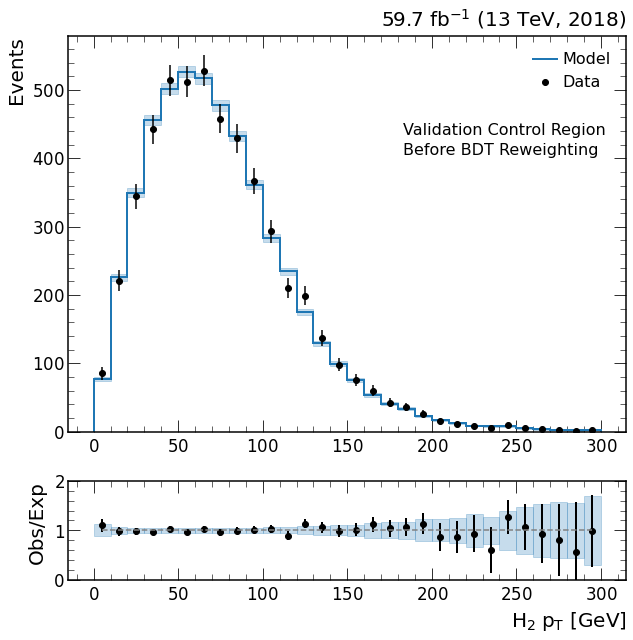

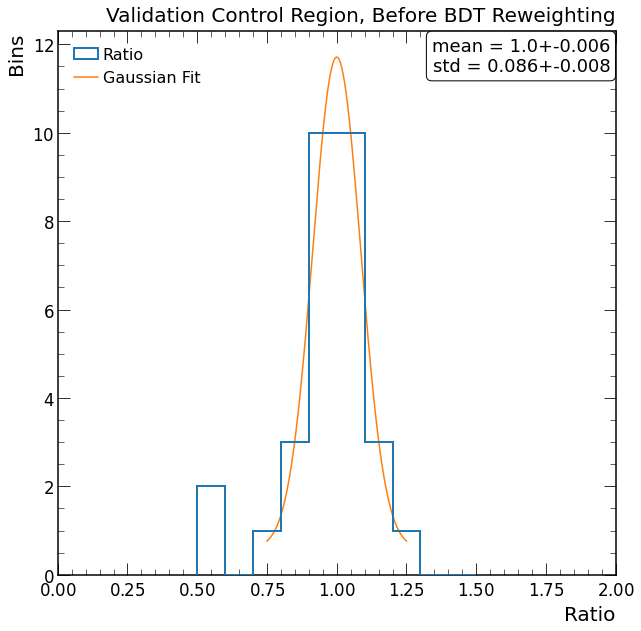

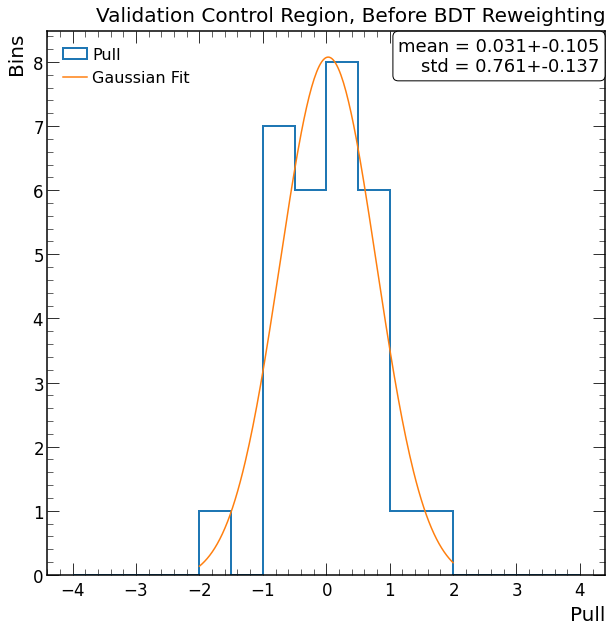

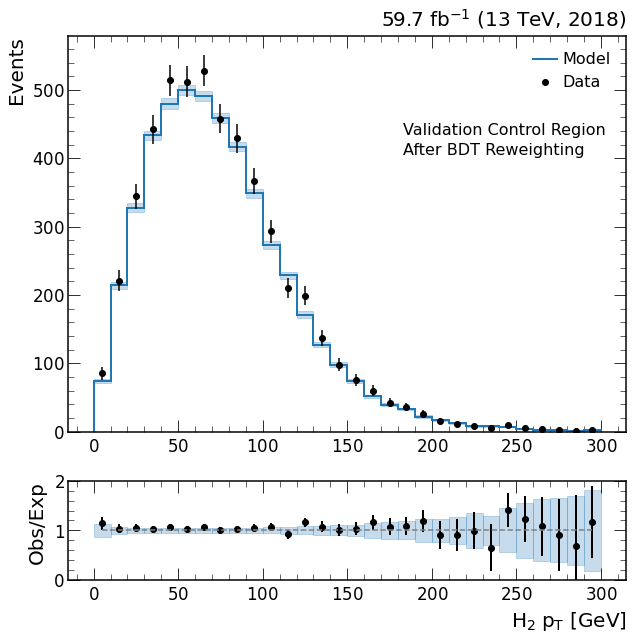

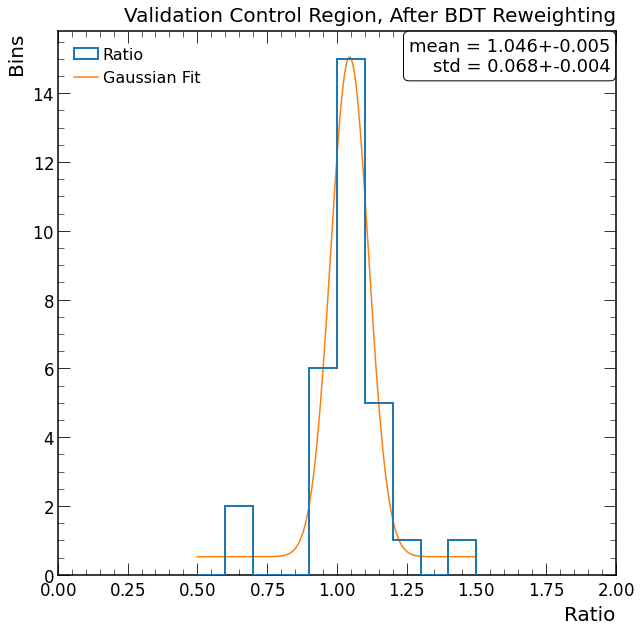

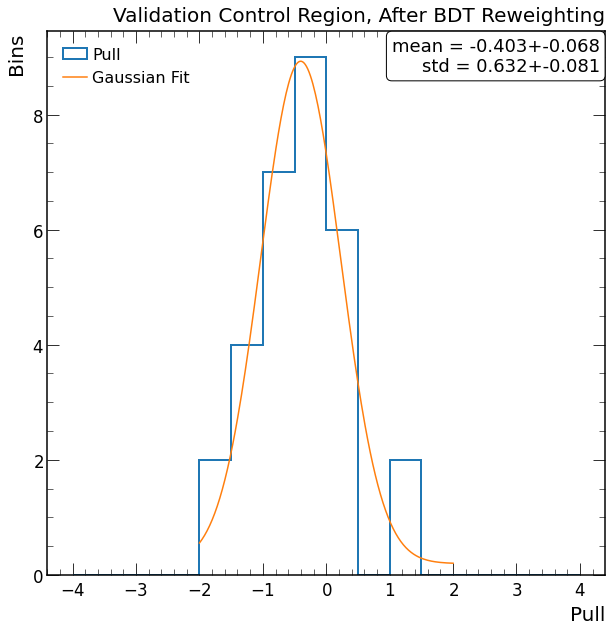

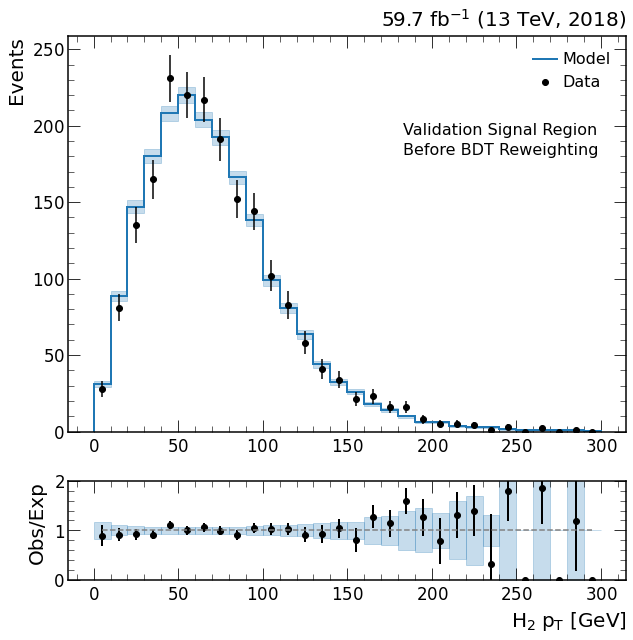

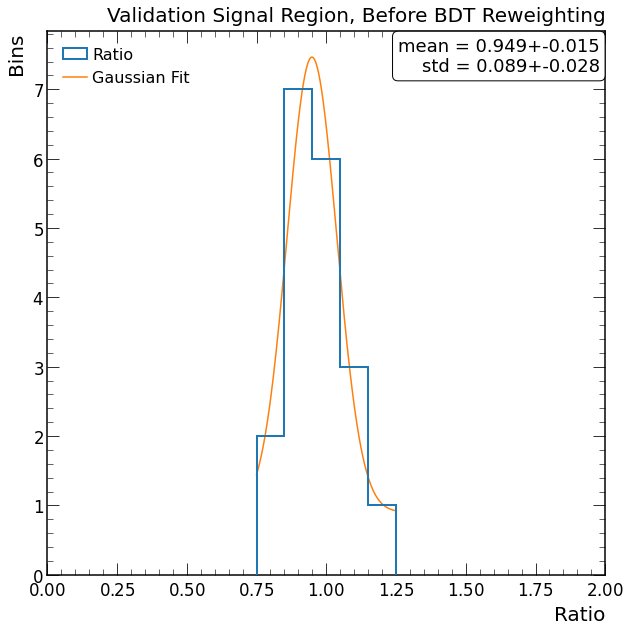

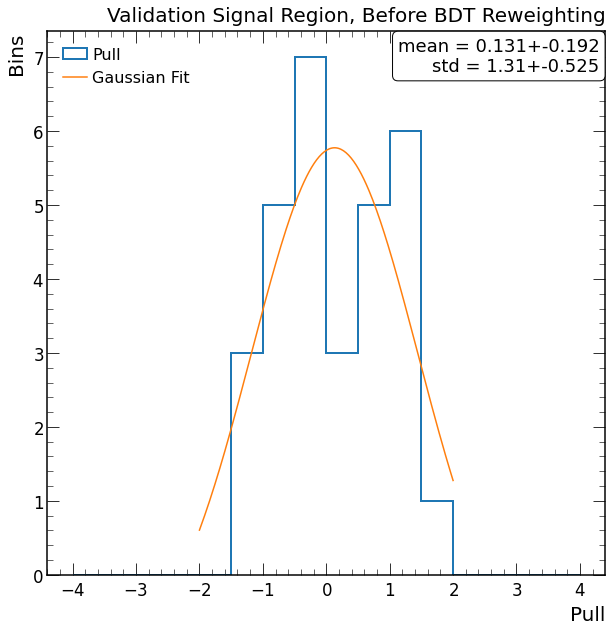

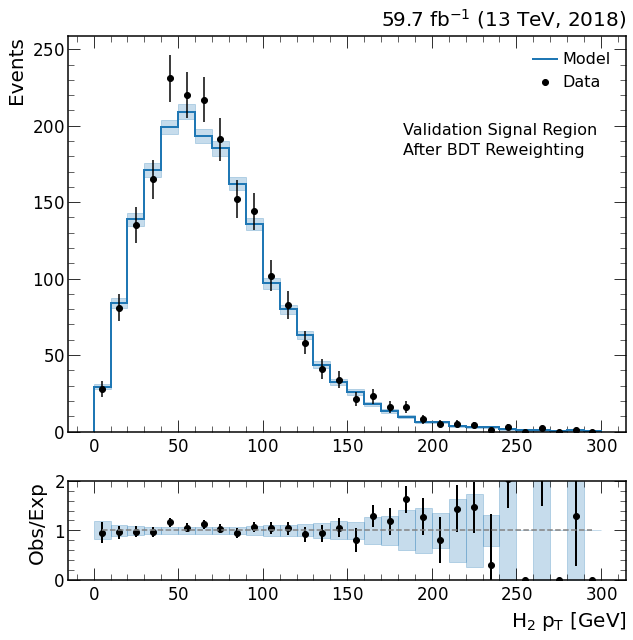

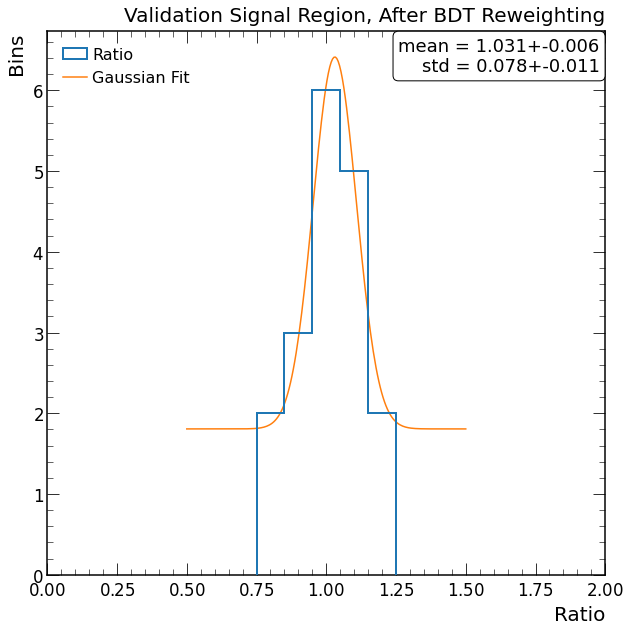

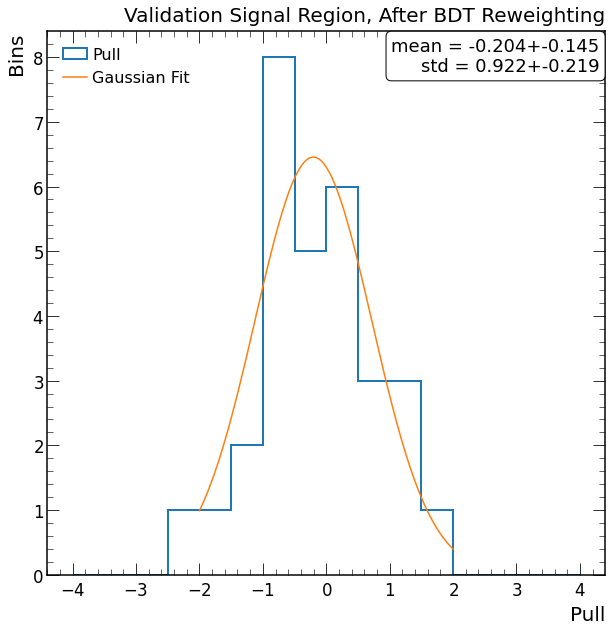

In [116]:
bin_width = 0.5

norm = data.V_CRhs_mask.sum()/data.V_CRls_mask.sum()

fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_CRls_mask, data.V_CRhs_mask, np.ones(sum(data.V_CRls_mask))*norm, density=False, vcr=True, variable='H2_pt')
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.6, 0.75, 'Validation Control Region', transform=ax.transAxes, fontsize=16)
ax.text(0.6, 0.7, 'Before BDT Reweighting', transform=ax.transAxes, fontsize=16)
fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_vcr_before_bdt.pdf')



fig, ax = plt.subplots()

ax.set_title('Validation Control Region, Before BDT Reweighting')

rBins = np.arange(0.5,1.50001,0.1)
rX = (rBins[:-1] + rBins[1:]) / 2
n_rat = Hist(n_ratio, bins=rBins, ax=ax, label='Ratio', align='mid', zorder=10)
ax.set_xlim(0,2)

mean = (rX*n_rat).sum()/n_rat.sum()
sigma = np.sqrt(sum(n_rat * (rX-mean) ** 2) / sum(n_rat))

X = np.linspace(0.75,1.25,200)
params, covar = curve_fit(gauss, rX, n_rat, p0=[min(n_rat), max(n_rat), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

y_r = gauss(rX, H, A, x0, s)
y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')

ax.legend(loc=2)
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.set_xlabel('Ratio')
ax.set_ylabel('Bins')

fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_ratio_vcr_before_bdt.pdf')

fig, ax = plt.subplots()

bins = np.arange(-3,3.0001,bin_width)
diff = n_exp - n_obs
e_diff = np.sqrt(n_obs + data.VR_err)
pull = diff / e_diff
n_pull, e = np.histogram(pull, bins=bins)
pBins = np.arange(-4,4.0001,bin_width)
pX = (pBins[:-1] + pBins[1:]) / 2
N_pull = Hist(pull, bins=pBins, ax=ax, align='mid', label='Pull')
err_pull = np.sqrt(N_pull)
# for n,err,xval in zip(N_pull, err_pull, pX):
    # ax3.plot([xval,xval],[n+err,n-err], color='C0')

x = (bins[:-1] + bins[1:]) / 2
X = np.linspace(-2,2,200)

ax.set_xlabel('Pull')
ax.set_ylabel('Bins')

ax.legend(loc=2)
ax.set_title('Validation Control Region, Before BDT Reweighting')

mean = (x*n_pull).sum()/n_pull.sum()
sigma = np.sqrt(sum(n_pull * (x - mean) ** 2) / sum(n_pull))

params, covar = curve_fit(gauss, x, n_pull, p0=[min(n_pull), max(n_pull), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

fit_pull = gauss(pX, H, A, x0, s)

y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.legend(loc=2)

fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_pull_vcr_before_bdt.pdf')








fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_CRls_mask, data.V_CRhs_mask, data.V_CR_ls_weights, density=False, vcr=True, variable='H2_pt')
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.6, 0.75, 'Validation Control Region', transform=ax.transAxes, fontsize=16)
ax.text(0.6, 0.7, 'After BDT Reweighting', transform=ax.transAxes, fontsize=16)
fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_vcr_after_bdt.pdf')

fig, ax = plt.subplots()

rBins = np.arange(0.5,1.50001,0.1)
rX = (rBins[:-1] + rBins[1:]) / 2
n_rat = Hist(n_ratio, bins=rBins, ax=ax, label='Ratio', align='mid', zorder=10)
ax.set_xlim(0,2)

mean = (rX*n_rat).sum()/n_rat.sum()
sigma = np.sqrt(sum(n_rat * (rX-mean) ** 2) / sum(n_rat))

X = np.linspace(0.5,1.5,200)
params, covar = curve_fit(gauss, rX, n_rat, p0=[min(n_rat), max(n_rat), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

y_r = gauss(rX, H, A, x0, s)
y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')

ax.legend(loc=2)
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.set_xlabel('Ratio')
ax.set_ylabel('Bins')

ax.set_title('Validation Control Region, After BDT Reweighting')
fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_ratio_vcr_after_bdt.pdf')


fig, ax = plt.subplots()

bins = np.arange(-3,3.0001,bin_width)
diff = n_exp - n_obs
e_diff = np.sqrt(n_obs + data.VR_err)
pull = diff / e_diff
n_pull, e = np.histogram(pull, bins=bins)
pBins = np.arange(-4,4.0001,bin_width)
pX = (pBins[:-1] + pBins[1:]) / 2
N_pull = Hist(pull, bins=pBins, ax=ax, align='mid', label='Pull')
err_pull = np.sqrt(N_pull)
# for n,err,xval in zip(N_pull, err_pull, pX):
    # ax3.plot([xval,xval],[n+err,n-err], color='C0')

x = (bins[:-1] + bins[1:]) / 2
X = np.linspace(-2,2,200)

ax.set_xlabel('Pull')
ax.set_ylabel('Bins')

mean = (x*n_pull).sum()/n_pull.sum()
sigma = np.sqrt(sum(n_pull * (x - mean) ** 2) / sum(n_pull))

params, covar = curve_fit(gauss, x, n_pull, p0=[min(n_pull), max(n_pull), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

fit_pull = gauss(pX, H, A, x0, s)

y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.set_title('Validation Control Region, After BDT Reweighting')

ax.legend(loc=2)

fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_pull_vcr_after_bdt.pdf')






fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_SRls_mask, data.V_SRhs_mask, np.ones(sum(data.V_SRls_mask))*norm, density=False, vcr=True, variable='H2_pt')
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.6, 0.75, 'Validation Signal Region', transform=ax.transAxes, fontsize=16)
ax.text(0.6, 0.7, 'Before BDT Reweighting', transform=ax.transAxes, fontsize=16)
fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_vsr_before_bdt.pdf')


fig, ax = plt.subplots()

ax.set_title('Validation Signal Region, Before BDT Reweighting')

rBins = np.arange(0.75,1.250001,0.1)
rX = (rBins[:-1] + rBins[1:]) / 2
n_rat = Hist(n_ratio, bins=rBins, ax=ax, label='Ratio', align='mid', zorder=10)
ax.set_xlim(0,2)

mean = (rX*n_rat).sum()/n_rat.sum()
sigma = np.sqrt(sum(n_rat * (rX-mean) ** 2) / sum(n_rat))

X = np.linspace(0.75,1.25,200)
params, covar = curve_fit(gauss, rX, n_rat, p0=[min(n_rat), max(n_rat), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

y_r = gauss(rX, H, A, x0, s)
y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')

ax.legend(loc=2)
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.set_xlabel('Ratio')
ax.set_ylabel('Bins')

fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_ratio_vsr_before_bdt.pdf')


fig, ax = plt.subplots()

bins = np.arange(-3,3.0001,bin_width)
diff = n_exp - n_obs
e_diff = np.sqrt(n_obs + data.VR_err)
pull = diff / e_diff
n_pull, e = np.histogram(pull, bins=bins)
pBins = np.arange(-4,4.0001,bin_width)
pX = (pBins[:-1] + pBins[1:]) / 2
N_pull = Hist(pull, bins=pBins, ax=ax, align='mid', label='Pull')
err_pull = np.sqrt(N_pull)
# for n,err,xval in zip(N_pull, err_pull, pX):
    # ax3.plot([xval,xval],[n+err,n-err], color='C0')

x = (bins[:-1] + bins[1:]) / 2
X = np.linspace(-2,2,200)

ax.set_xlabel('Pull')
ax.set_ylabel('Bins')

ax.legend(loc=2)
ax.set_title('Validation Signal Region, Before BDT Reweighting')

mean = (x*n_pull).sum()/n_pull.sum()
sigma = np.sqrt(sum(n_pull * (x - mean) ** 2) / sum(n_pull))

params, covar = curve_fit(gauss, x, n_pull, p0=[min(n_pull), max(n_pull), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

fit_pull = gauss(pX, H, A, x0, s)

y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.legend(loc=2)
fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_pull_vsr_before_bdt.pdf')








fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_SRls_mask, data.V_SRhs_mask, data.V_SR_ls_weights, density=False, vcr=True, variable='H2_pt')
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.6, 0.75, 'Validation Signal Region', transform=ax.transAxes, fontsize=16)
ax.text(0.6, 0.7, 'After BDT Reweighting', transform=ax.transAxes, fontsize=16)
fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_vsr_after_bdt.pdf')
# data.vr_hist(data.A_CRls_mask, data.A_CRhs_mask, data.A_CR_ls_weights, density=False, vcr=True, variable='H2_pt')

# axs[0].set_title('Validation Control Region')

fig, ax = plt.subplots()

ax.set_title('Validation Signal Region, After BDT Reweighting')

rBins = np.arange(0.75,1.250001,0.1)
rX = (rBins[:-1] + rBins[1:]) / 2
n_rat = Hist(n_ratio, bins=rBins, ax=ax, label='Ratio', align='mid', zorder=10)
ax.set_xlim(0,2)

mean = (rX*n_rat).sum()/n_rat.sum()
sigma = np.sqrt(sum(n_rat * (rX-mean) ** 2) / sum(n_rat))

X = np.linspace(0.5,1.5,200)
params, covar = curve_fit(gauss, rX, n_rat, p0=[min(n_rat), max(n_rat), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

y_r = gauss(rX, H, A, x0, s)
y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')

ax.legend(loc=2)
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.set_xlabel('Ratio')
ax.set_ylabel('Bins')

fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_ratio_vsr_after_bdt.pdf')



fig, ax = plt.subplots()

bins = np.arange(-3,3.0001,bin_width)
diff = n_exp - n_obs
e_diff = np.sqrt(n_obs + data.VR_err)
pull = diff / e_diff
n_pull, e = np.histogram(pull, bins=bins)
pBins = np.arange(-4,4.0001,bin_width)
pX = (pBins[:-1] + pBins[1:]) / 2
N_pull = Hist(pull, bins=pBins, ax=ax, align='mid', label='Pull')
err_pull = np.sqrt(N_pull)
# for n,err,xval in zip(N_pull, err_pull, pX):
    # ax3.plot([xval,xval],[n+err,n-err], color='C0')

x = (bins[:-1] + bins[1:]) / 2
X = np.linspace(-2,2,200)

ax.set_xlabel('Pull')
ax.set_ylabel('Bins')

ax.legend(loc=2)
ax.set_title('Validation Signal Region, After BDT Reweighting')

mean = (x*n_pull).sum()/n_pull.sum()
sigma = np.sqrt(sum(n_pull * (x - mean) ** 2) / sum(n_pull))

params, covar = curve_fit(gauss, x, n_pull, p0=[min(n_pull), max(n_pull), mean, sigma])
H, A, x0, s = params
std = np.around(np.sqrt(np.diag(covar)),3)

fit_pull = gauss(pX, H, A, x0, s)

y = gauss(X, H, A, x0, s)
ax.plot(X, y, label='Gaussian Fit')
box = {
    'boxstyle' :'round',
    'fc' : 'white'
}
ax.text(.99,.99,f"mean = {round(x0,3)}+-{std[2]}\nstd = {round(s,3)}+-{std[3]}", transform=ax.transAxes, bbox=box, fontsize=18, va='top', ha='right')

ax.legend(loc=2)

fig.savefig('plots/6_background_modeling/btag_pt/H2_pt_pull_vsr_after_bdt.pdf')

Text(0.6, 0.7, 'After BDT Reweighting')

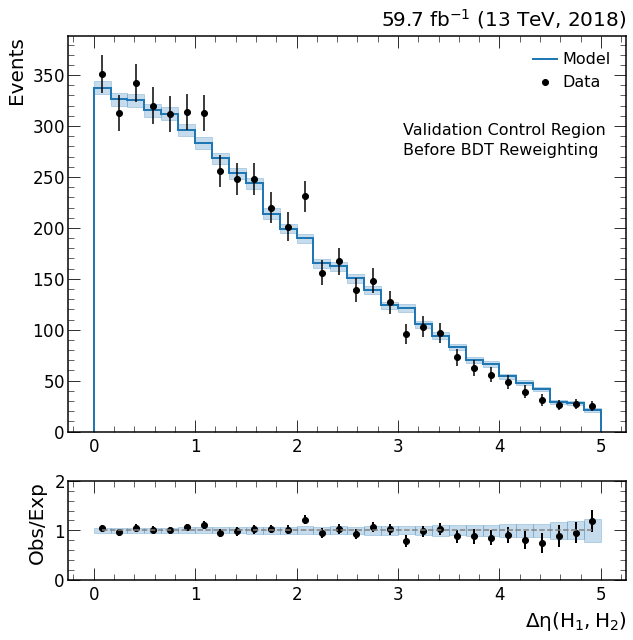

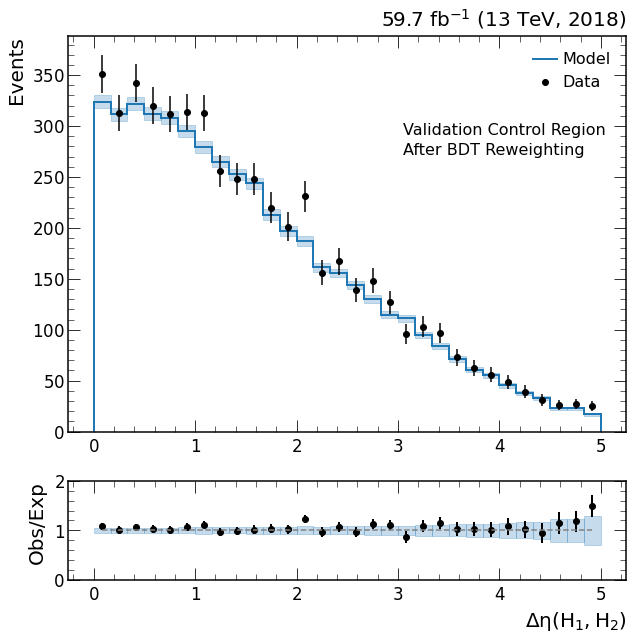

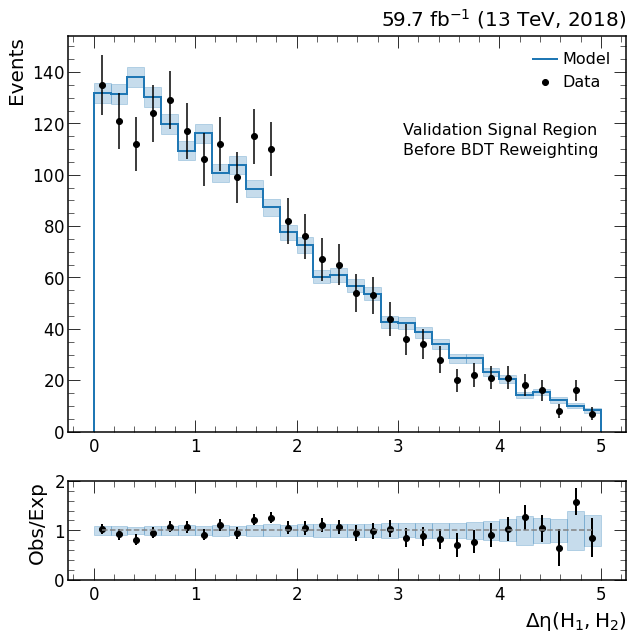

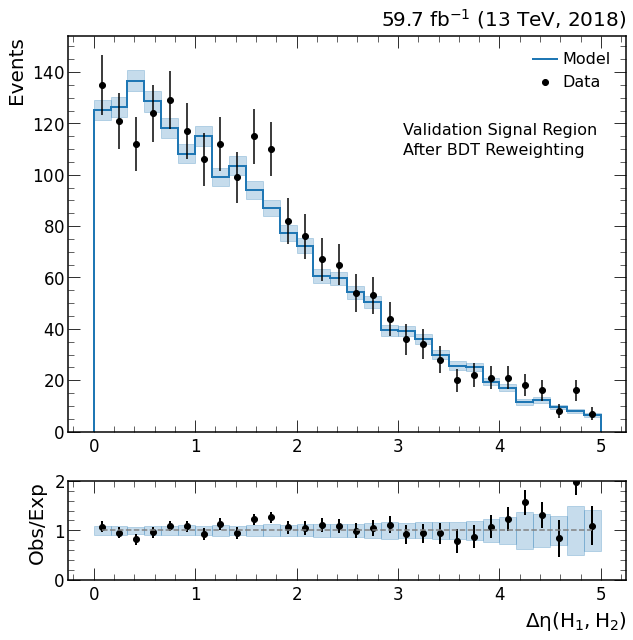

In [113]:
norm = data.V_CRhs_mask.sum()/data.V_CRls_mask.sum()

fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_CRls_mask, data.V_CRhs_mask, np.ones(sum(data.V_CRls_mask))*norm, density=False, vcr=True, variable='H1_H2_dEta')
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.6, 0.75, 'Validation Control Region', transform=ax.transAxes, fontsize=16)
ax.text(0.6, 0.7, 'Before BDT Reweighting', transform=ax.transAxes, fontsize=16)
# fig.savefig('plots/6_background_modeling/btag_pt/mx_vcr_before_bdt.pdf')
# fig.savefig('plots/6_background_modeling/btag_pt/H1_H2_dEta_vcr_before_bdt.pdf')

fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_CRls_mask, data.V_CRhs_mask, data.V_CR_ls_weights, density=False, vcr=True, variable='H1_H2_dEta')
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.6, 0.75, 'Validation Control Region', transform=ax.transAxes, fontsize=16)
ax.text(0.6, 0.7, 'After BDT Reweighting', transform=ax.transAxes, fontsize=16)
# fig.savefig('plots/6_background_modeling/btag_pt/H1_H2_dEta_vcr_after_bdt.pdf')

fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_SRls_mask, data.V_SRhs_mask, np.ones(sum(data.V_SRls_mask))*norm, density=False, vcr=True, variable='H1_H2_dEta')
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.6, 0.75, 'Validation Signal Region', transform=ax.transAxes, fontsize=16)
ax.text(0.6, 0.7, 'Before BDT Reweighting', transform=ax.transAxes, fontsize=16)
# fig.savefig('plots/6_background_modeling/btag_pt/mx_vsr_before_bdt.pdf')
# fig.savefig('plots/6_background_modeling/btag_pt/H1_H2_dEta_vsr_before_bdt.pdf')


fig, axs, n_exp, n_obs, n_ratio = data.vr_hist(data.V_SRls_mask, data.V_SRhs_mask, data.V_SR_ls_weights, density=False, vcr=True, variable='H1_H2_dEta')
ax = axs[0]
ax.set_title(data.sample)
ax.text(0.6, 0.75, 'Validation Signal Region', transform=ax.transAxes, fontsize=16)
ax.text(0.6, 0.7, 'After BDT Reweighting', transform=ax.transAxes, fontsize=16)
# fig.savefig('plots/6_background_modeling/btag_pt/H1_H2_dEta_vsr_after_bdt.pdf')
# data.vr_hist(data.A_CRls_mask, data.A_CRhs_mask, data.A_CR_ls_weights, density=False, vcr=True, variable='H1_H2_dEta')

# axs[0].set_title('Validation Control Region')

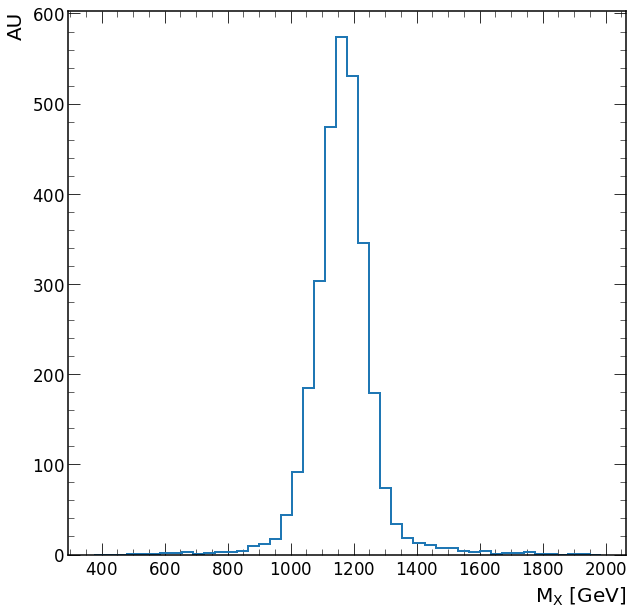

In [75]:
n_sixb = sixb.sr_hist()
n_sixb = np.where(n_sixb == 0, 1e-3, n_sixb)

In [77]:
model = Model(n_sixb, n_data, sumw2=data.sumw2)
limits = model.upperlimit()
limits[1]

[DeviceArray(0.0085243, dtype=float64),
 DeviceArray(0.00880649, dtype=float64),
 DeviceArray(0.01482252, dtype=float64),
 DeviceArray(0.01742108, dtype=float64),
 DeviceArray(0.02493057, dtype=float64)]

In [98]:
sixb.cutflow_norm

array([100,  78,  62,  51])

In [ ]:
x_mBins = (data.mBins[:-1] + data.mBins[1:])/2

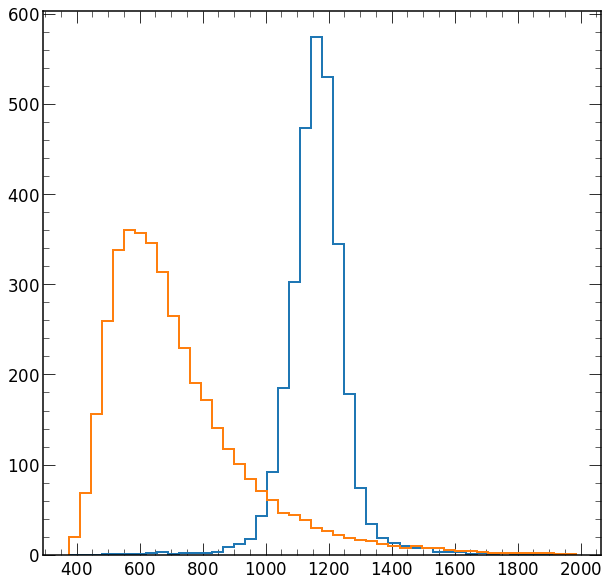

In [76]:
fig, ax = plt.subplots()

_ = Hist(x_mBins, bins=data.mBins, weights=n_sixb, ax=ax)
_ = Hist(x_mBins, bins=data.mBins, weights=n_data, ax=ax)